In [1]:
map_file_name = 'rooms.map'
scen_file_name = 'rooms.scen'
answer_file_name = map_file_name + '.ans'

In [2]:
import os.path
from pathlib import Path
import numpy as np

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'


In [3]:
res_folder = Path().cwd().parents[0] / 'data' / 'rooms'

In [4]:
import reader as reader

MAP = reader.read_map(res_folder / map_file_name)
SCEN = reader.read_scen(res_folder / scen_file_name)
RES = reader.read_res(res_folder / answer_file_name)
#M = reader.read_map("minimap.txt")
#S = reader.read_res("minires.txt")

In [5]:


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from animation import animate_list
from draw_filling import draw_filling
from show_map import show_map

In [6]:
"""
res = []
for i in range(len(RES)):
    res.append(animate_list(list(map(draw_filling, show_map(MAP, SCEN, RES, i, withPath=True))), play=False))
animate_list(res, play=False)
"""

'\nres = []\nfor i in range(len(RES)):\n    res.append(animate_list(list(map(draw_filling, show_map(MAP, SCEN, RES, i, withPath=True))), play=False))\nanimate_list(res, play=False)\n'

In [7]:
import reader as reader
import numpy as np

benchmark_folder = Path().cwd().parents[0] / 'data'

In [42]:

def show_success_rate(t, c):
    fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
    ax.set_ylabel('Success rate')
    ax.set_xlabel('Number of agents')
    plt.title('Success rate')
    for i, algo in enumerate(t):
        agents = list(map(lambda x: x[0] * c, algo[1]))
        success_rate = list(map(lambda x: x[1], algo[1]))
        ax.plot(agents, success_rate, marker = 'o', label=algo[0])
    ax.legend()
    plt.show()  
    

def show_finish_rate(t, c):
    fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
    ax.set_ylabel('Finish rate')
    ax.set_xlabel('Number of agents')
    plt.title('Finish rate')
    for i, algo in enumerate(t):
        agents = list(map(lambda x: x[0] * c, algo[1]))
        success_rate = list(map(lambda x: x[1] / c, algo[1]))
        ax.plot(agents, success_rate, marker = 'o', label=algo[0])
    ax.legend()
    plt.show() 


def show_runtime(t, c):
    fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
    plt.title('Runtime')
    ax.set_ylabel('Average runtime')
    ax.set_xlabel('Number of agents')
    for i, algo in enumerate(t):
        agents = list(map(lambda x: x[0] * c, algo[1]))
        success_rate = list(map(lambda x: x[1], algo[1]))
        ax.plot(agents, success_rate, marker = 'o', label=algo[0])
    ax.legend()
    plt.show()
    d = {'N': np.arange(1, len(t[0][1]) + 1)}
    for (algo, res) in t:
        d.update({ algo : list(map(lambda x: round(x[1], 4), res))})
    dataframe = pd.DataFrame(d)
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot()

    ax.table(cellText = dataframe.values,
          rowLabels = dataframe.index,
          colLabels = dataframe.columns,
          loc = "center"
         )
    #ax.set_title("Runtime")
    ax.axis("off");
    

import pandas as pd
    
def show_answer(t, c):
    d = {'N': np.arange(1, len(t[0][1]) + 1)}
    for (algo, res) in t:
        d.update({ algo : list(map(lambda x: round(x[1], 2), res))})
    dataframe = pd.DataFrame(d)
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot()

    ax.table(cellText = dataframe.values,
          rowLabels = dataframe.index,
          colLabels = dataframe.columns,
          loc = "center"
         )
    #ax.set_title("Runtime")
    ax.axis("off");
    
def get_results(t, names, c=None):
    res = []
    for name in names:
        cc = t[name]
        if (c != None):
            cc = list(filter(lambda x: x[0] <= c, cc))
        res.append((name, cc))
    return res

In [33]:
success, ans, nodes, time, NLAUNCH = reader.read_benchmark(benchmark_folder  / 'empty-16-16' / "empty-16-16-opt.map.ben", 2)
success = {k: list(map(lambda xx: (xx[0], xx[1] * 1.0 / NLAUNCH), v.items())) for k, v in success.items()}
time = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in time.items()}
ans = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in ans.items()}
nodes = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in nodes.items()}

0
CENTRALIZED(SLOW)
CENTRALIZED
1
CENTRALIZED(SLOW)
CENTRALIZED
2
CENTRALIZED(SLOW)
CENTRALIZED
3
CENTRALIZED(SLOW)
CENTRALIZED
4
CENTRALIZED(SLOW)
CENTRALIZED
5
CENTRALIZED(SLOW)
CENTRALIZED
6
CENTRALIZED(SLOW)
CENTRALIZED
7
CENTRALIZED(SLOW)
CENTRALIZED
8
CENTRALIZED(SLOW)
CENTRALIZED
9
CENTRALIZED(SLOW)
CENTRALIZED
10
CENTRALIZED(SLOW)
CENTRALIZED
11
CENTRALIZED(SLOW)
CENTRALIZED
12
CENTRALIZED(SLOW)
CENTRALIZED
13
CENTRALIZED(SLOW)
CENTRALIZED
14
CENTRALIZED(SLOW)
CENTRALIZED
15
CENTRALIZED(SLOW)
CENTRALIZED
16
CENTRALIZED(SLOW)
CENTRALIZED
17
CENTRALIZED(SLOW)
CENTRALIZED
18
CENTRALIZED(SLOW)
CENTRALIZED
19
CENTRALIZED(SLOW)
CENTRALIZED


In [34]:
success, ans, nodes, time, NLAUNCH = reader.read_benchmark(benchmark_folder  / 'empty-16-16' / "empty-16-16-strategy2.map.ben", 3)
success = {k: list(map(lambda xx: (xx[0], xx[1] * 1.0 / NLAUNCH), v.items())) for k, v in success.items()}
time = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in time.items()}
ans = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in ans.items()}
nodes = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in nodes.items()}

0
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(POSITION)
1
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(POSITION)
2
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(POSITION)
3
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(POSITION)
4
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(POSITION)
5
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(POSITION)
6
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(POSITION)
7
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(POSITION)
8
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(POSITION)
9
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(POSITION)
10
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(POSITION)
11
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(

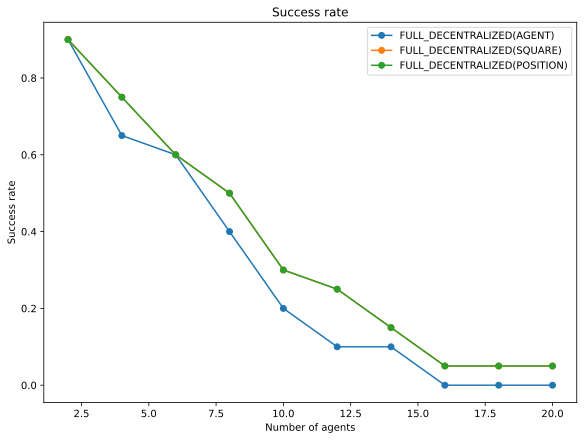

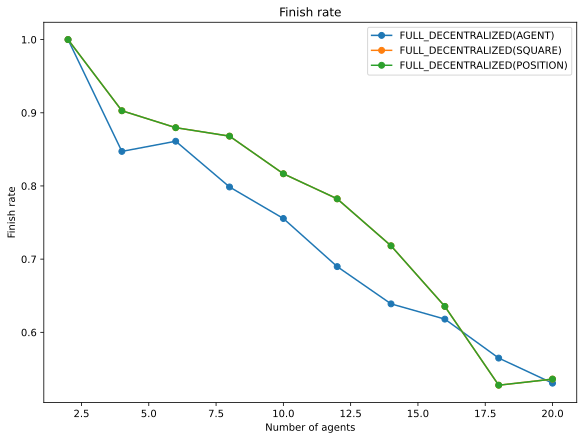

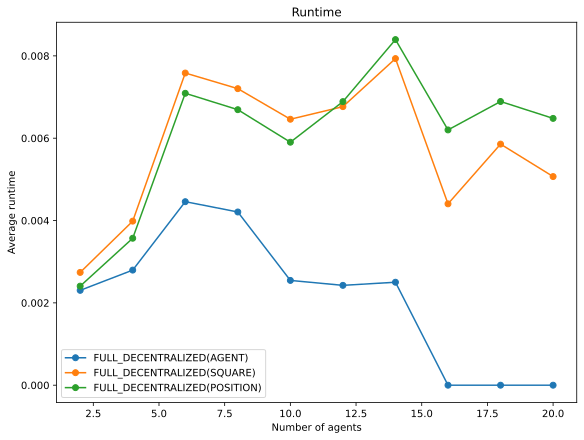

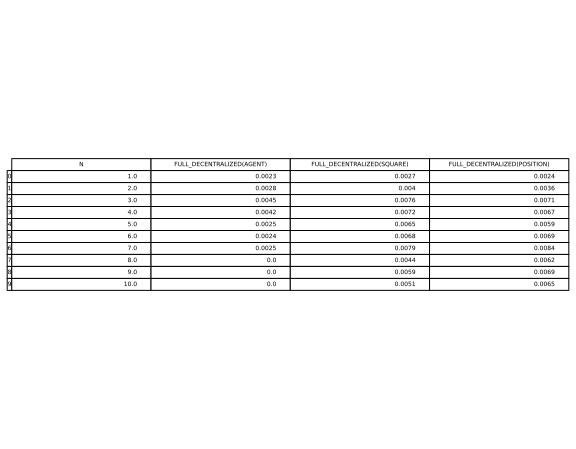

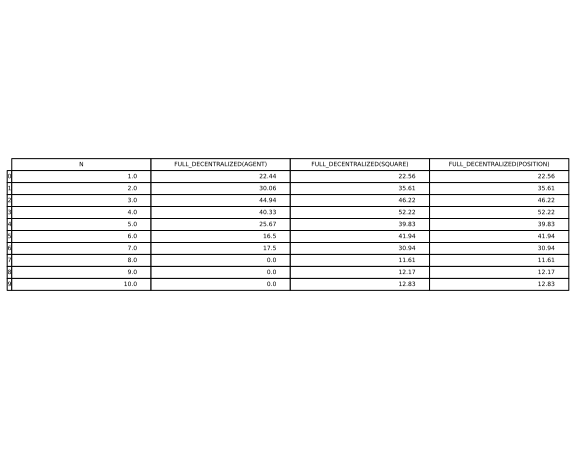

In [35]:
arr = [
'FULL_DECENTRALIZED(AGENT)',
'FULL_DECENTRALIZED(SQUARE)',
'FULL_DECENTRALIZED(POSITION)'
]

show_success_rate(get_results(success, arr), 1)

show_finish_rate(get_results(nodes, arr), 1)

show_runtime(get_results(time, arr), 1)

show_answer(get_results(ans, arr), 1)


In [50]:
success, ans, nodes, time, NLAUNCH = reader.read_benchmark(benchmark_folder  / 'house' / "house-pt.map.ben", 5)
success = {k: list(map(lambda xx: (xx[0], xx[1] * 1.0 / NLAUNCH), v.items())) for k, v in success.items()}
time = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in time.items()}
ans = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in ans.items()}
nodes = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in nodes.items()}

0
CENTRALIZED
PARTIALLY-DECENTRALIZED
PARTIALLY-DECENTRALIZED+
PARTIALLY-DECENTRALIZED(NO_MAP)
FULL_DECENTRALIZED(POSITION)
1
CENTRALIZED
PARTIALLY-DECENTRALIZED
PARTIALLY-DECENTRALIZED+
PARTIALLY-DECENTRALIZED(NO_MAP)
FULL_DECENTRALIZED(POSITION)
2
CENTRALIZED
PARTIALLY-DECENTRALIZED
PARTIALLY-DECENTRALIZED+
PARTIALLY-DECENTRALIZED(NO_MAP)
FULL_DECENTRALIZED(POSITION)
3
CENTRALIZED
PARTIALLY-DECENTRALIZED
PARTIALLY-DECENTRALIZED+
PARTIALLY-DECENTRALIZED(NO_MAP)
FULL_DECENTRALIZED(POSITION)
4
CENTRALIZED
PARTIALLY-DECENTRALIZED
PARTIALLY-DECENTRALIZED+
PARTIALLY-DECENTRALIZED(NO_MAP)
FULL_DECENTRALIZED(POSITION)
5
CENTRALIZED
PARTIALLY-DECENTRALIZED
PARTIALLY-DECENTRALIZED+
PARTIALLY-DECENTRALIZED(NO_MAP)
FULL_DECENTRALIZED(POSITION)
6
CENTRALIZED
PARTIALLY-DECENTRALIZED
PARTIALLY-DECENTRALIZED+
PARTIALLY-DECENTRALIZED(NO_MAP)
FULL_DECENTRALIZED(POSITION)
7
CENTRALIZED
PARTIALLY-DECENTRALIZED
PARTIALLY-DECENTRALIZED+
PARTIALLY-DECENTRALIZED(NO_MAP)
FULL_DECENTRALIZED(POSITION)
8
CENTRA

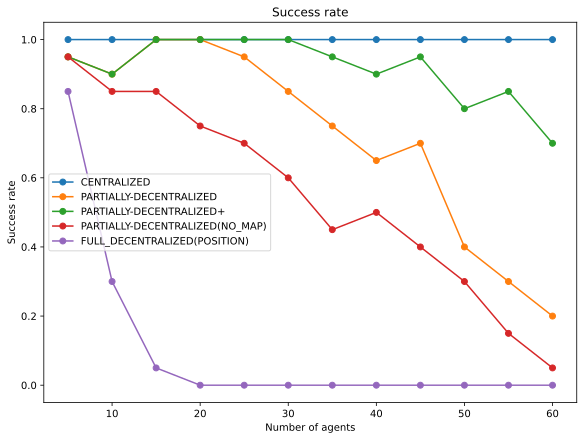

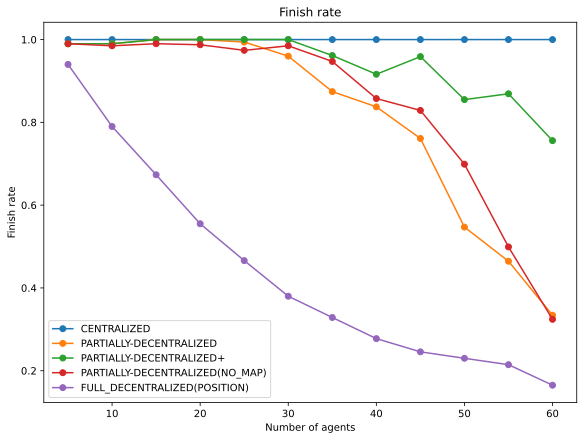

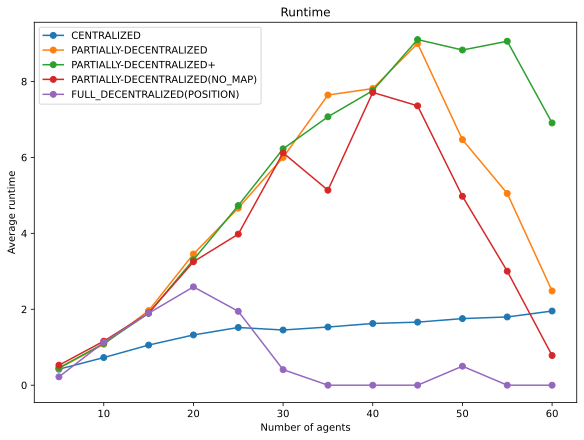

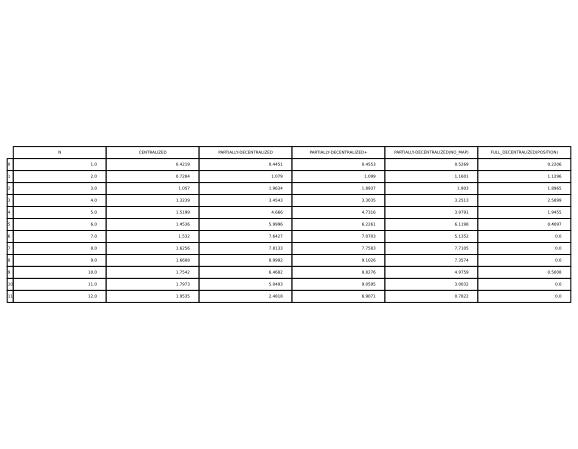

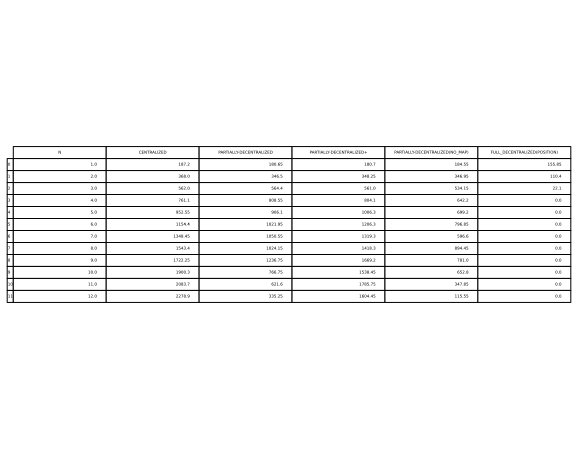

In [51]:
arr = [
'CENTRALIZED',
    'PARTIALLY-DECENTRALIZED',
    'PARTIALLY-DECENTRALIZED+',
    'PARTIALLY-DECENTRALIZED(NO_MAP)',
    'FULL_DECENTRALIZED(POSITION)'
]

show_success_rate(get_results(success, arr), 1)

show_finish_rate(get_results(nodes, arr), 1)

show_runtime(get_results(time, arr), 1)

show_answer(get_results(ans, arr), 1)


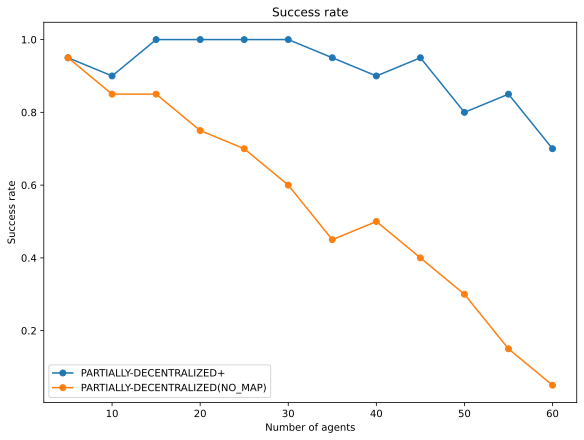

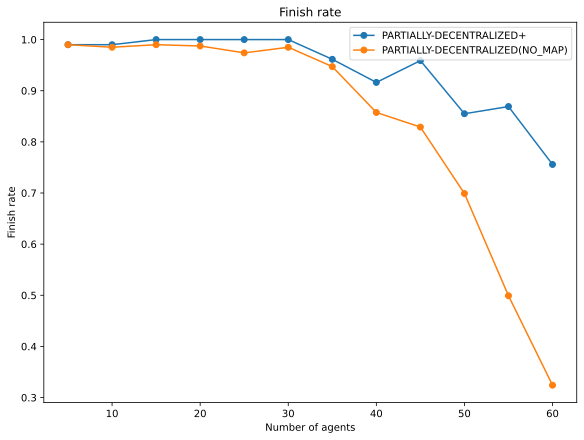

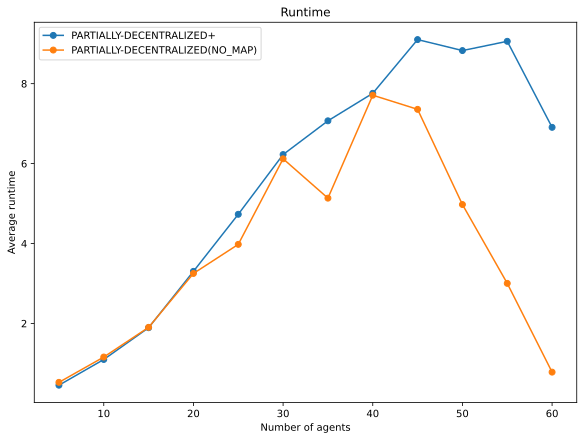

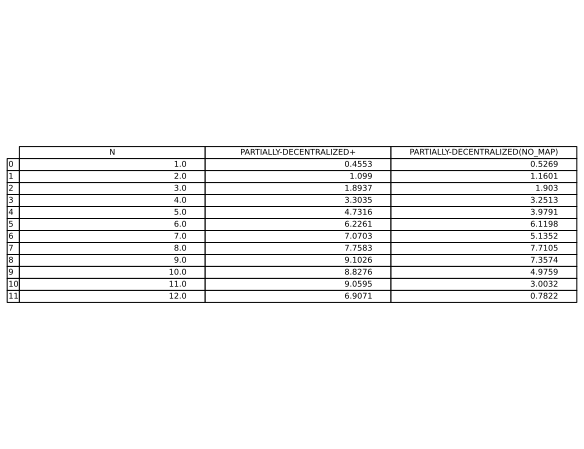

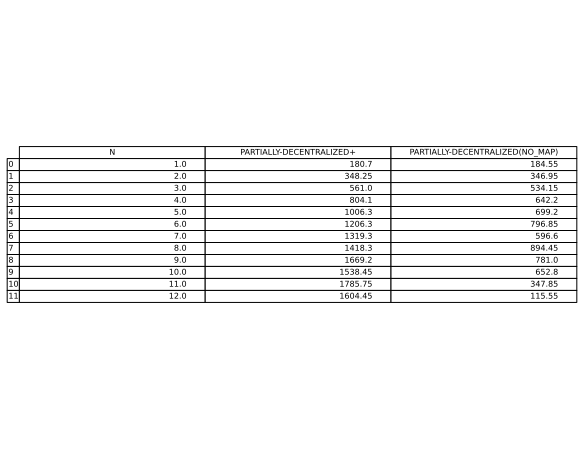

In [55]:
arr = [
    'PARTIALLY-DECENTRALIZED+',
    'PARTIALLY-DECENTRALIZED(NO_MAP)'
]

show_success_rate(get_results(success, arr), 1)

show_finish_rate(get_results(nodes, arr), 1)

show_runtime(get_results(time, arr), 1)

show_answer(get_results(ans, arr), 1)


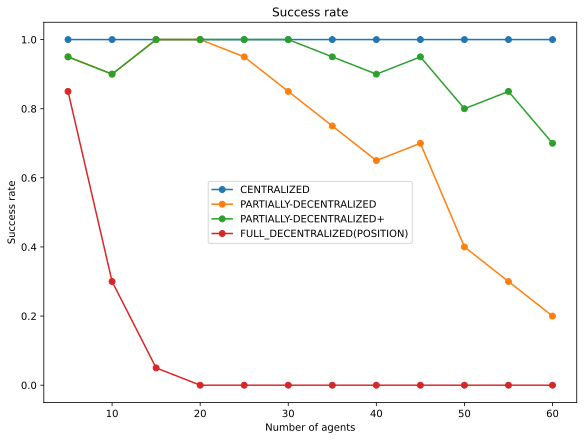

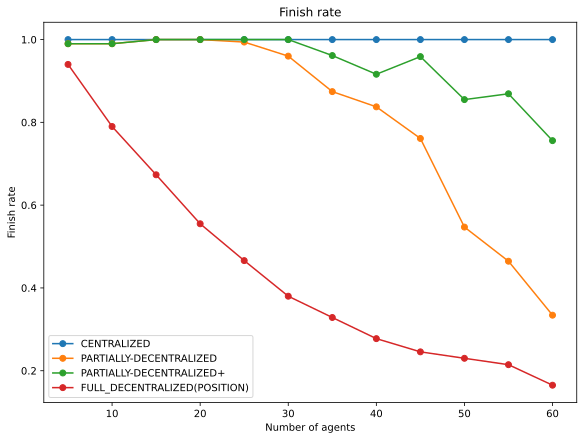

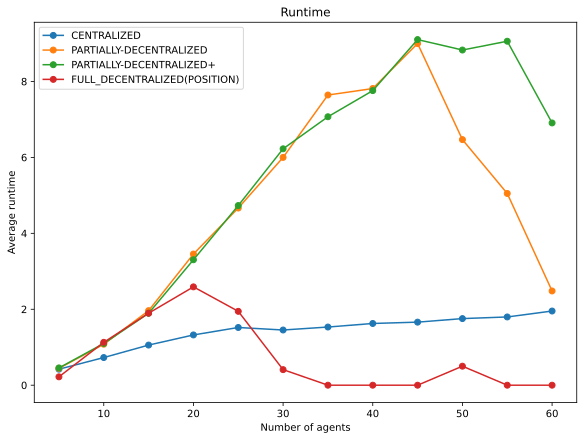

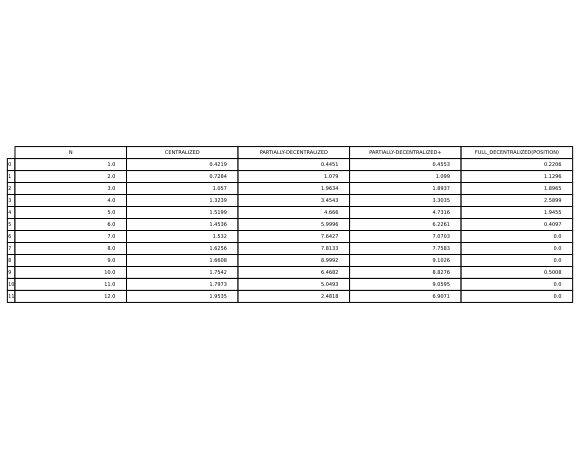

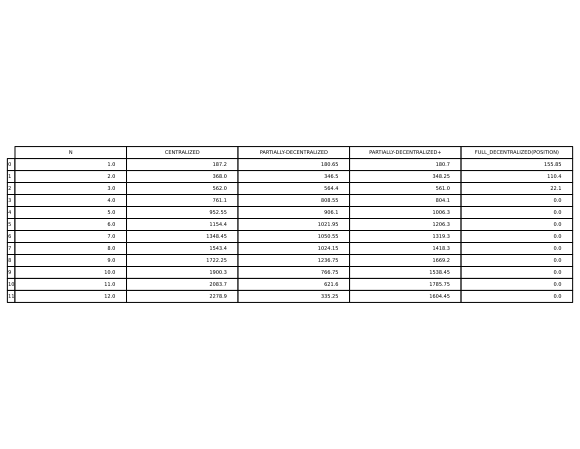

In [58]:
arr = [
    'CENTRALIZED',
    'PARTIALLY-DECENTRALIZED',
    'PARTIALLY-DECENTRALIZED+',
    'FULL_DECENTRALIZED(POSITION)'
]

show_success_rate(get_results(success, arr), 1)

show_finish_rate(get_results(nodes, arr), 1)

show_runtime(get_results(time, arr), 1)

show_answer(get_results(ans, arr), 1)


In [37]:
success, ans, nodes, time, NLAUNCH = reader.read_benchmark(benchmark_folder  / 'house' / "house-pd.map.ben", 3)
success = {k: list(map(lambda xx: (xx[0], xx[1] * 1.0 / NLAUNCH), v.items())) for k, v in success.items()}
time = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in time.items()}
ans = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in ans.items()}
nodes = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in nodes.items()}

0
PARTIALLY-CENTRALIZED
PARTIALLY-CENTRALIZED+
PARTIALLY-CENTRALIZED(NO_MAP)
1
PARTIALLY-CENTRALIZED
PARTIALLY-CENTRALIZED+
PARTIALLY-CENTRALIZED(NO_MAP)
2
PARTIALLY-CENTRALIZED
PARTIALLY-CENTRALIZED+
PARTIALLY-CENTRALIZED(NO_MAP)
3
PARTIALLY-CENTRALIZED
PARTIALLY-CENTRALIZED+
PARTIALLY-CENTRALIZED(NO_MAP)
4
PARTIALLY-CENTRALIZED
PARTIALLY-CENTRALIZED+
PARTIALLY-CENTRALIZED(NO_MAP)
5
PARTIALLY-CENTRALIZED
PARTIALLY-CENTRALIZED+
PARTIALLY-CENTRALIZED(NO_MAP)
6
PARTIALLY-CENTRALIZED
PARTIALLY-CENTRALIZED+
PARTIALLY-CENTRALIZED(NO_MAP)
7
PARTIALLY-CENTRALIZED
PARTIALLY-CENTRALIZED+
PARTIALLY-CENTRALIZED(NO_MAP)
8
PARTIALLY-CENTRALIZED
PARTIALLY-CENTRALIZED+
PARTIALLY-CENTRALIZED(NO_MAP)
9
PARTIALLY-CENTRALIZED
PARTIALLY-CENTRALIZED+
PARTIALLY-CENTRALIZED(NO_MAP)


In [38]:
print(success)

{'PARTIALLY-CENTRALIZED': [(5, 1.0), (10, 1.0), (15, 1.0), (20, 1.0), (25, 1.0), (30, 0.9), (35, 0.8), (40, 0.4), (45, 0.1), (50, 0.2)], 'PARTIALLY-CENTRALIZED+': [(5, 1.0), (10, 1.0), (15, 1.0), (20, 1.0), (25, 1.0), (30, 1.0), (35, 1.0), (40, 0.9), (45, 0.5), (50, 0.5)], 'PARTIALLY-CENTRALIZED(NO_MAP)': [(5, 1.0), (10, 1.0), (15, 1.0), (20, 1.0), (25, 1.0), (30, 0.9), (35, 0.8), (40, 0.3), (45, 0.1), (50, 0.1)]}


[(5, 1.0), (10, 1.0), (15, 1.0), (20, 1.0), (25, 1.0), (30, 0.9), (35, 0.8), (40, 0.4), (45, 0.1), (50, 0.2)]
[(5, 1.0), (10, 1.0), (15, 1.0), (20, 1.0), (25, 1.0), (30, 1.0), (35, 1.0), (40, 0.9), (45, 0.5), (50, 0.5)]
[(5, 1.0), (10, 1.0), (15, 1.0), (20, 1.0), (25, 1.0), (30, 0.9), (35, 0.8), (40, 0.3), (45, 0.1), (50, 0.1)]


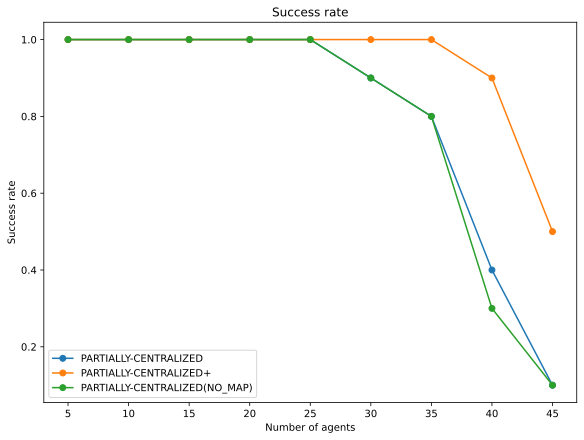

[(5, 0.43678720000000004), (10, 1.0906436999999998), (15, 2.1697169), (20, 3.150568), (25, 4.892745), (30, 5.76778), (35, 6.496286), (40, 3.0733179999999996), (45, 1.5635970000000001), (50, 1.671318)]
[(5, 0.43050499999999997), (10, 1.0931521), (15, 2.0721364), (20, 3.1372159), (25, 4.683941), (30, 5.857705), (35, 7.504822), (40, 6.785369), (45, 4.0047), (50, 5.281373)]
[(5, 0.4598217), (10, 1.2930218), (15, 2.563896), (20, 3.9046410000000003), (25, 5.443884), (30, 5.858035), (35, 7.43735), (40, 3.348905), (45, 0.556924), (50, 1.7901630000000002)]


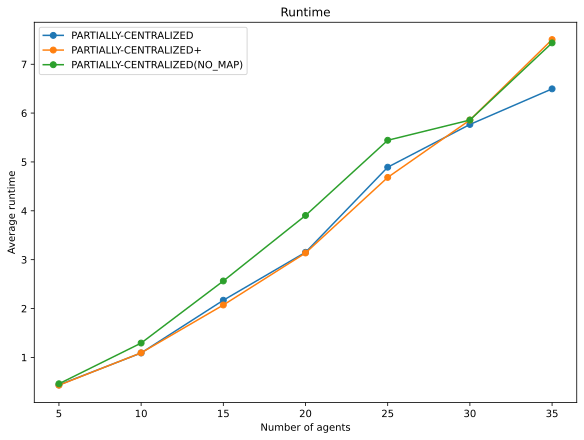

[(5, 1.0), (10, 1.0), (15, 1.0), (20, 1.0), (25, 1.0), (30, 0.9366666666666668), (35, 0.862857142857143), (40, 0.5125000000000001), (45, 0.2977777777777778), (50, 0.318)]
[(5, 1.0), (10, 1.0), (15, 1.0), (20, 1.0), (25, 1.0), (30, 1.0), (35, 1.0), (40, 0.9275), (45, 0.6222222222222223), (50, 0.576)]
[(5, 1.0), (10, 1.0), (15, 1.0), (20, 1.0), (25, 1.0), (30, 0.9266666666666667), (35, 0.8571428571428573), (40, 0.49499999999999994), (45, 0.4), (50, 0.26800000000000007)]


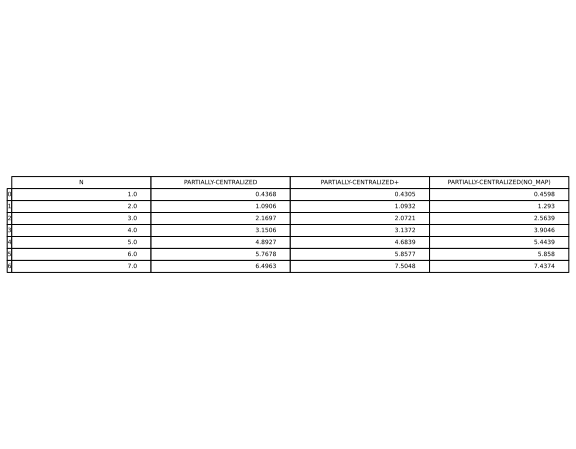

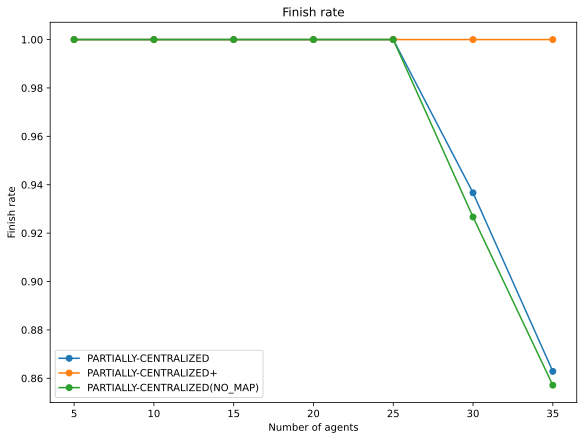

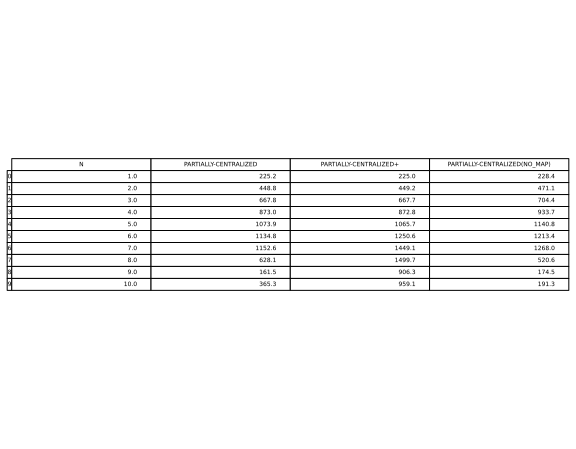

In [43]:
arr = [
    'PARTIALLY-CENTRALIZED',
    'PARTIALLY-CENTRALIZED+',
    'PARTIALLY-CENTRALIZED(NO_MAP)'
]

show_success_rate(get_results(success, arr, 45), 1)

show_runtime(get_results(time, arr, 35), 1)


show_finish_rate(get_results(nodes, arr, 35), 1)

show_answer(get_results(ans, arr), 1)


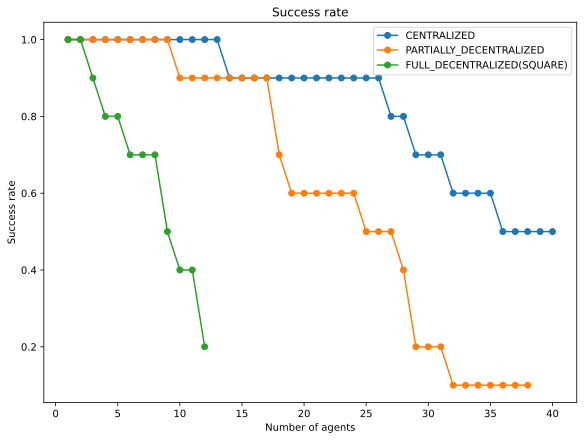

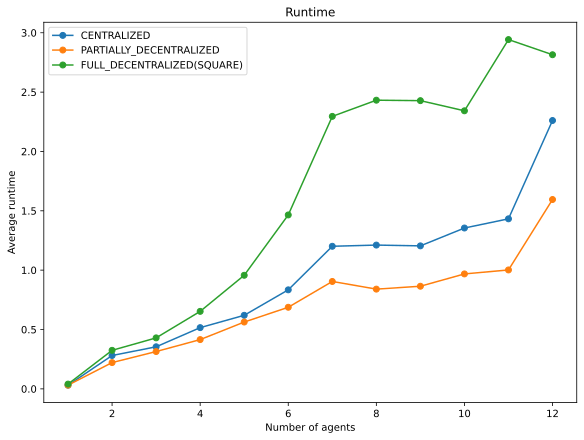

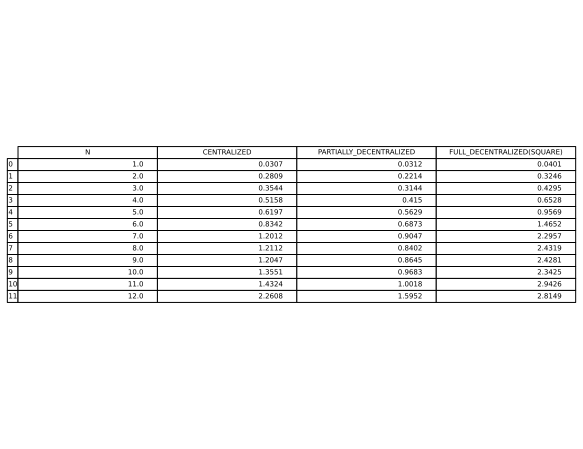

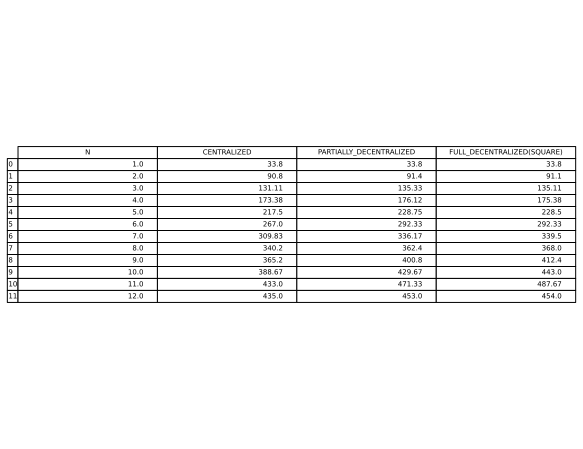

In [14]:
arr = [
'CENTRALIZED',
    'PARTIALLY_DECENTRALIZED',
    'FULL_DECENTRALIZED(SQUARE)'
]

show_success_rate(get_results(success, arr), 1)

show_runtime(get_results(time, arr), 1)

show_answer(get_results(ans, arr), 1)


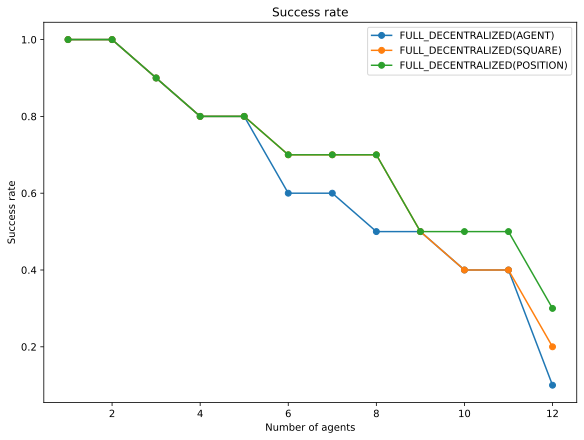

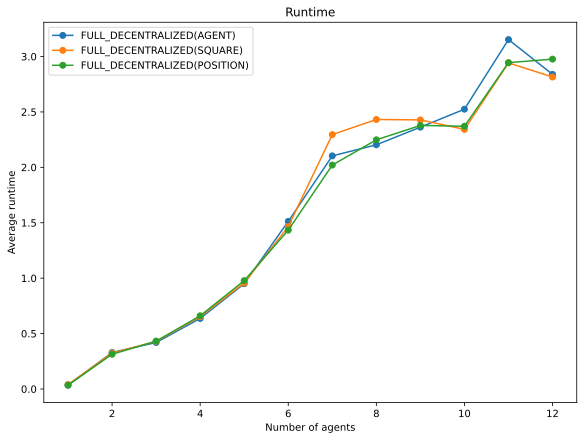

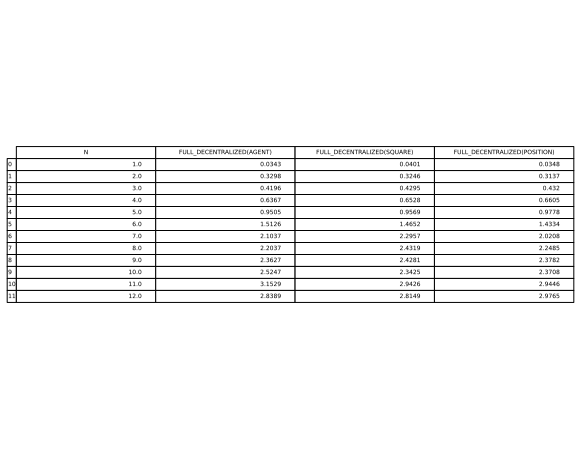

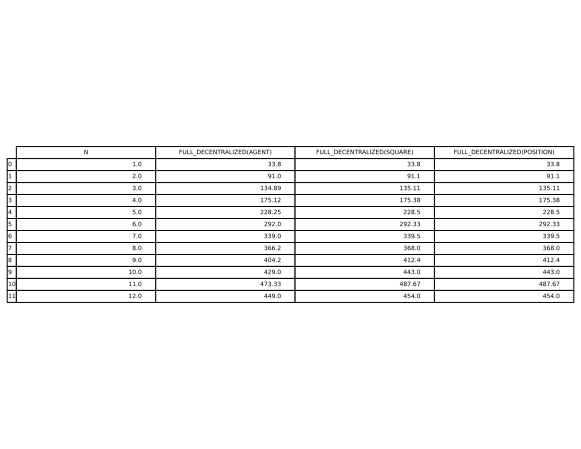

In [15]:
arr = [
    
    'FULL_DECENTRALIZED(AGENT)', 
    'FULL_DECENTRALIZED(SQUARE)',
    'FULL_DECENTRALIZED(POSITION)'
]

show_success_rate(get_results(success, arr), 1)

show_runtime(get_results(time, arr), 1)

show_answer(get_results(ans, arr), 1)


In [16]:
success, ans, nodes, time, NLAUNCH = reader.read_benchmark(benchmark_folder  / 'house' / "house.map.ben", 2)
success = {k: list(map(lambda xx: (xx[0], xx[1] * 1.0 / NLAUNCH), v.items())) for k, v in success.items()}
time = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in time.items()}
ans = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in ans.items()}
nodes = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in nodes.items()}

0
SLOW_CENTRALIZED
CENTRALIZED


ValueError: invalid literal for int() with base 10: 'PARTIALLY_DECENTRALIZED'

In [ ]:
arr = [
    'C-MPPA*(no_fr)',
'C-MPPA*',
]

show_success_rate(get_results(success, arr))

show_runtime(get_results(time, arr))

show_answer(get_results(ans, arr))


In [17]:
success, ans, nodes, time, NLAUNCH = reader.read_benchmark(benchmark_folder  / 'empty-16-16' / "empty-16-16-no-path.map.ben", 3)
success = {k: list(map(lambda xx: (xx[0], xx[1] * 1.0 / NLAUNCH), v.items())) for k, v in success.items()}
time = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in time.items()}
ans = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in ans.items()}
nodes = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in nodes.items()}



0
AGENT
SQUARE
POSITION
1
AGENT
SQUARE
POSITION
2
AGENT
SQUARE
POSITION
3
AGENT
SQUARE
POSITION
4
AGENT
SQUARE
POSITION
5
AGENT
SQUARE
POSITION
6
AGENT
SQUARE
POSITION
7
AGENT
SQUARE
POSITION
8
AGENT
SQUARE
POSITION
9
AGENT
SQUARE
POSITION
10
AGENT
SQUARE
POSITION
11
AGENT
SQUARE
POSITION
12
AGENT
SQUARE
POSITION
13
AGENT
SQUARE
POSITION
14
AGENT
SQUARE
POSITION
15
AGENT
SQUARE
POSITION
16
AGENT
SQUARE
POSITION
17
AGENT
SQUARE
POSITION
18
AGENT
SQUARE
POSITION
19
AGENT
SQUARE
POSITION
20
AGENT
SQUARE
POSITION
21
AGENT
SQUARE
POSITION
22
AGENT
SQUARE
POSITION
23
AGENT
SQUARE
POSITION
24
AGENT
SQUARE
POSITION
25
AGENT
SQUARE
POSITION
26
AGENT
SQUARE
POSITION
27
AGENT
SQUARE
POSITION
28
AGENT
SQUARE
POSITION
29
AGENT
SQUARE
POSITION
30
AGENT
SQUARE
POSITION
31
AGENT
SQUARE
POSITION
32
AGENT
SQUARE
POSITION
33
AGENT
SQUARE
POSITION
34
AGENT
SQUARE
POSITION
35
AGENT
SQUARE
POSITION
36
AGENT
SQUARE
POSITION
37
AGENT
SQUARE
POSITION
38
AGENT
SQUARE
POSITION
39
AGENT
SQUARE
POSITION


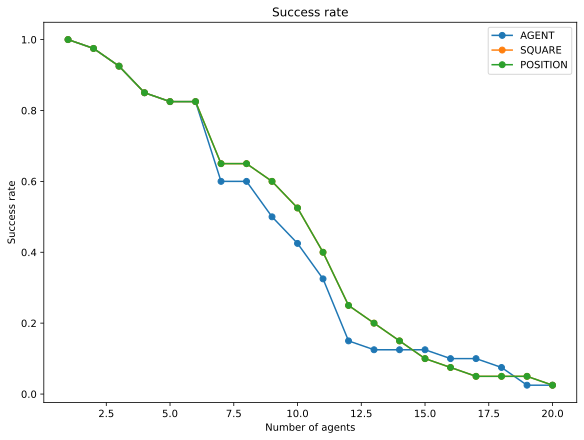

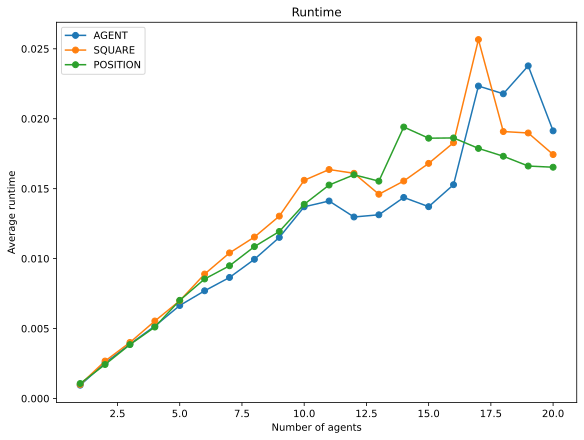

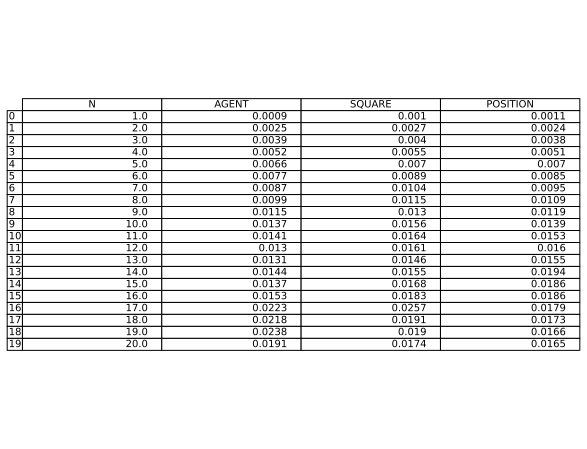

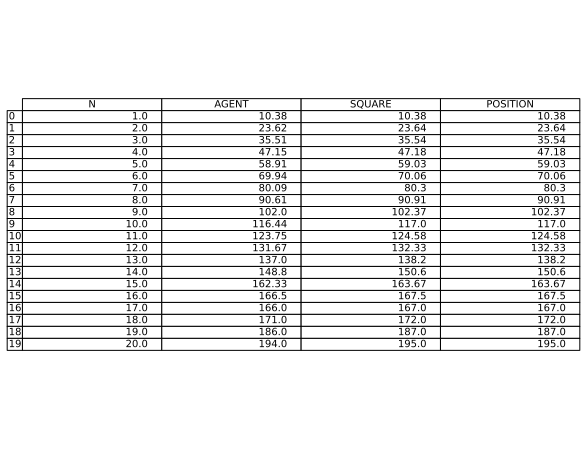

In [18]:
arr = [
'AGENT',
'SQUARE',
'POSITION'
]

show_success_rate(get_results(success, arr), 1)

show_runtime(get_results(time, arr), 1)

show_answer(get_results(ans, arr), 1)

In [19]:
success, ans, nodes, time, NLAUNCH = reader.read_benchmark(benchmark_folder  / 'empty-16-16' / "empty-16-16-conflict-resolution.map.ben", 4)
success = {k: list(map(lambda xx: (xx[0], xx[1] * 1.0 / NLAUNCH), v.items())) for k, v in success.items()}
time = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in time.items()}
ans = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in ans.items()}
nodes = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in nodes.items()}



0
NONE
RANDOM
BEST
WAIT
1
NONE
RANDOM
BEST
WAIT
2
NONE
RANDOM
BEST
WAIT
3
NONE
RANDOM
BEST
WAIT
4
NONE
RANDOM
BEST
WAIT
5
NONE
RANDOM
BEST
WAIT
6
NONE
RANDOM
BEST
WAIT
7
NONE
RANDOM
BEST
WAIT
8
NONE
RANDOM
BEST
WAIT
9
NONE
RANDOM
BEST
WAIT
10
NONE
RANDOM
BEST
WAIT
11
NONE
RANDOM
BEST
WAIT
12
NONE
RANDOM
BEST
WAIT
13
NONE
RANDOM
BEST
WAIT
14
NONE
RANDOM
BEST
WAIT
15
NONE
RANDOM
BEST
WAIT
16
NONE
RANDOM
BEST
WAIT
17
NONE
RANDOM
BEST
WAIT
18
NONE
RANDOM
BEST
WAIT
19
NONE
RANDOM
BEST
WAIT


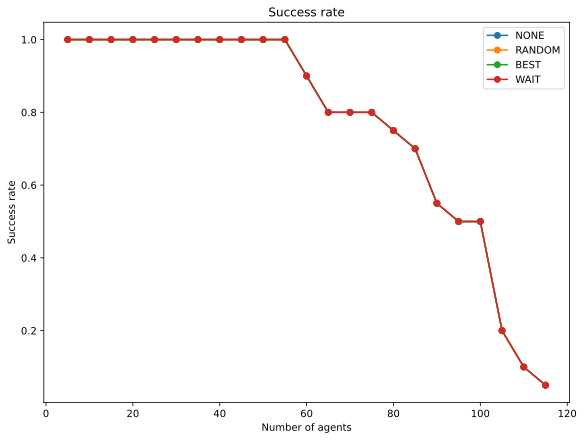

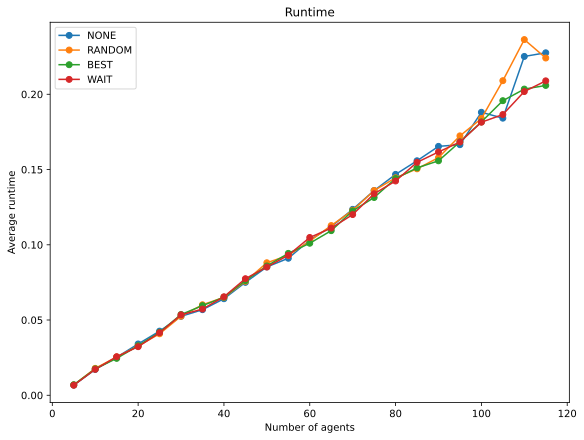

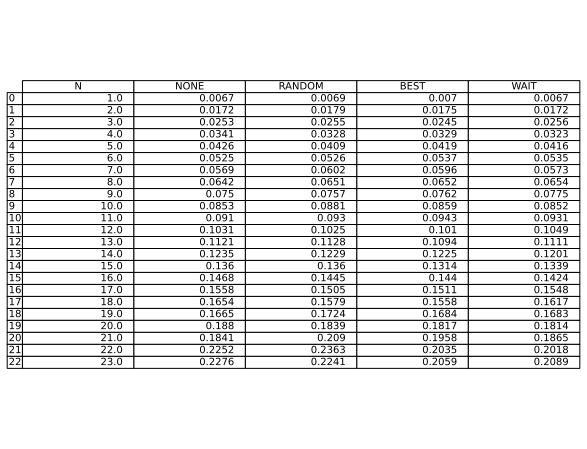

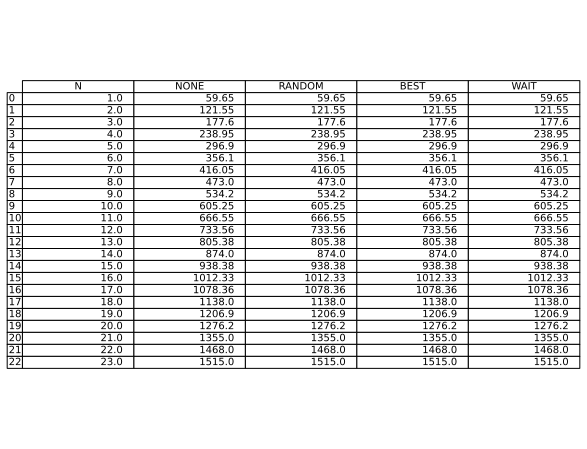

In [20]:
arr = [
'NONE',
'RANDOM',
'BEST',
'WAIT'
]

show_success_rate(get_results(success, arr), 5)

show_runtime(get_results(time, arr), 5)

show_answer(get_results(ans, arr), 5)

In [21]:
arr = [
'C-MPPA*',
'PD-MPPA*',
'FD-MPPA*(with_map)'
]

show_success_rate(get_results(success, arr))

show_runtime(get_results(time, arr))

show_answer(get_results(ans, arr))

KeyError: 'C-MPPA*'

In [ ]:
arr = [
'PD-MPPA*',
'PD-MPPA*(no_map)'
]

show_success_rate(get_results(success, arr))

show_runtime(get_results(time, arr))

show_answer(get_results(ans, arr))

In [ ]:
arr = [
'FD-MPPA*(with_map)',
'FD-MPPA*'
]

show_success_rate(get_results(success, arr))

show_runtime(get_results(time, arr))

show_answer(get_results(ans, arr))

In [22]:
success, ans, nodes, time, NLAUNCH = reader.read_benchmark(benchmark_folder  / 'empty-16-16' / "empty-16-16.map.ben",6)
success = {k: list(map(lambda xx: (xx[0], xx[1] * 1.0 / NLAUNCH), v.items())) for k, v in success.items()}
time = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in time.items()}
ans = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in ans.items()}
nodes = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in nodes.items()}

0
PARTIALLY_DECENTRALIZED
PARTIALLY_DECENTRALIZED(ONLY_VISIBLE)
PARTIALLY_DECENTRALIZED(WITHOUT_MAP)
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(POSITION)
1
PARTIALLY_DECENTRALIZED
PARTIALLY_DECENTRALIZED(ONLY_VISIBLE)
PARTIALLY_DECENTRALIZED(WITHOUT_MAP)
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(POSITION)
2
PARTIALLY_DECENTRALIZED
PARTIALLY_DECENTRALIZED(ONLY_VISIBLE)
PARTIALLY_DECENTRALIZED(WITHOUT_MAP)
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(POSITION)
3
PARTIALLY_DECENTRALIZED
PARTIALLY_DECENTRALIZED(ONLY_VISIBLE)
PARTIALLY_DECENTRALIZED(WITHOUT_MAP)
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(POSITION)
4
PARTIALLY_DECENTRALIZED
PARTIALLY_DECENTRALIZED(ONLY_VISIBLE)
PARTIALLY_DECENTRALIZED(WITHOUT_MAP)
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(SQUARE)
FULL_DECENTRALIZED(POSITION)
5
PARTIALLY_DECENTRALIZED
PARTIALLY_DECENTRALIZED(ONLY_VISIBLE)
PARTIALLY_DECENTRALIZ

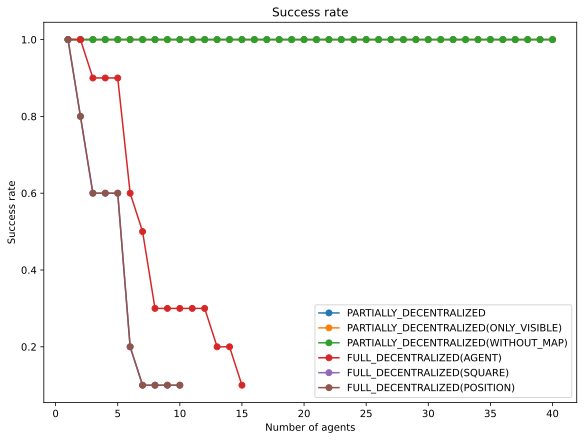

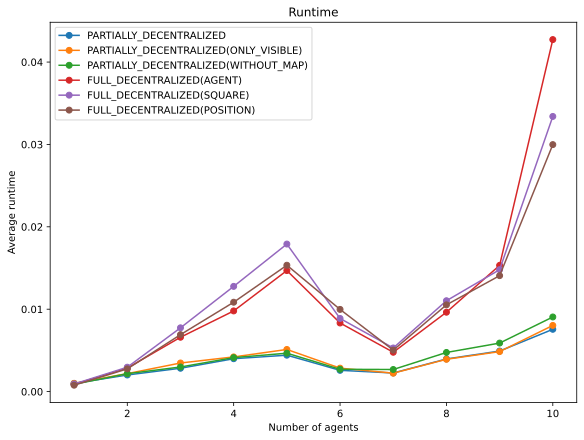

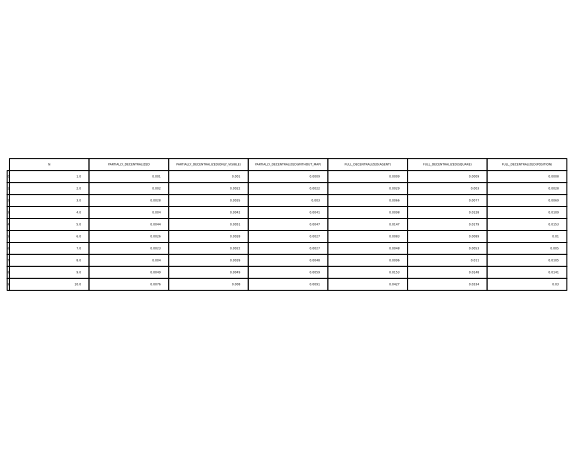

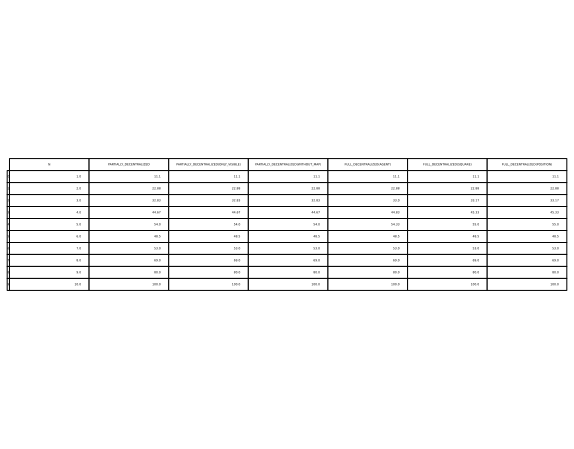

In [23]:
arr = [
'PARTIALLY_DECENTRALIZED',
'PARTIALLY_DECENTRALIZED(ONLY_VISIBLE)',
'PARTIALLY_DECENTRALIZED(WITHOUT_MAP)',
'FULL_DECENTRALIZED(AGENT)',
'FULL_DECENTRALIZED(SQUARE)',
'FULL_DECENTRALIZED(POSITION)'
]

show_success_rate(get_results(success, arr), 1)

show_runtime(get_results(time, arr), 1)

show_answer(get_results(ans, arr), 1)